In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
from scipy.sparse.linalg import eigsh

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

In [2]:
n = 2000 # sample size
p = 100 # dimension
L = 300 # band size
mu_norm = 10

setting = "$n = {} \\quad p = {} \\quad L = {} \quad || \mu || = {}$".format(n, p, L, mu_norm)

c = p/n
epsilon = (2*L-1)/n

pm1_setting = False

if pm1_setting:
    k = 2 # number of classes
    pi = np.array([0.5, 0.5]) # proportion of each class
    mu = stats.norm.rvs(size=(p, 1))
    M = np.concatenate([+mu, -mu], axis=1)
else:
    k = 3 # number of classes
    pi = np.array([0.334, 0.333, 0.333]) # proportion of each class
    M = stats.norm.rvs(size=(p, k))

M = mu_norm*M/np.linalg.norm(M, axis=0) # centroid of each class
J = utils.getJ(n, pi)
P = M@(J.T)
Z = stats.norm.rvs(size=(p, n))
X = P+Z

T = utils.gen_mask(n, L, kind='toeplitz')
K = (X.T)@X/p*T

In [3]:
N_permut = 10
N_eigvecs = 5
eigvals = np.zeros((N_permut, N_eigvecs))
eigvecs = np.zeros((N_permut, n, N_eigvecs))

permuts = np.zeros((N_permut, n), dtype=int)
permut = np.arange(n)
for i in tqdm(range(N_permut)):
    permuts[i] = permut
    eigvals[i], eigvecs[i] = eigsh(K[permut][:, permut], k=N_eigvecs, which='LA')
    np.random.shuffle(permut)

100%|██████████| 10/10 [00:02<00:00,  4.52it/s]


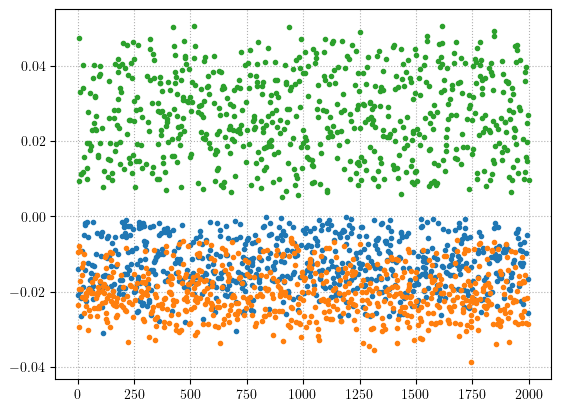

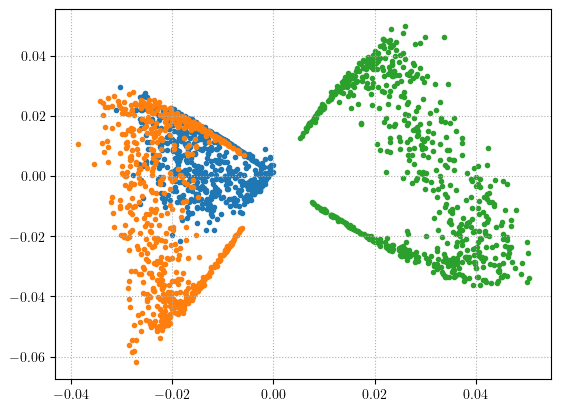

In [5]:
r = 1
i1, i2 = 1, 2

x = np.arange(n)
for j in range(k):
    cl = (J[:, j] == 1)[permuts[r]]
    plt.plot(x[cl], eigvecs[r, cl, N_eigvecs-i1], ls='', marker='.')
plt.grid(ls=':')
plt.show()

for j in range(k):
    cl = (J[:, j] == 1)[permuts[r]]
    plt.scatter(eigvecs[r, cl, N_eigvecs-i1], eigvecs[r, cl, N_eigvecs-i2], marker='.')
plt.grid(ls=':')
plt.show()